In [1]:
from glob import glob
import datatree
import numpy as np
import xarray as xr

#import xsarslc
#from xsarslc.processing import xspectra

from datatree import DataTree

import matplotlib.pyplot as plt

from cwave import compute_cwave_parameters
from compute_from_l1b import compute_xs_from_l1b

path = '/home/datawork-cersat-public/project/sarwave/data/products/tests/iw/slc/l1b/1.4/'
safe_file = path + 'S1A_IW_SLC__1SDV_20211026T164727_20211026T164754_040293_04C642_C0D1.SAFE/'
pol='vv';level='*_L1B_*'
files = glob(safe_file + 's1*-iw*-slc-'+pol+'*'+level+'*.nc')
_file = files[0]


_file

'/home/datawork-cersat-public/project/sarwave/data/products/tests/iw/slc/l1b/1.4/S1A_IW_SLC__1SDV_20211026T164727_20211026T164754_040293_04C642_C0D1.SAFE/s1a-iw1-slc-vv-20211026t164729-20211026t164754-040293-04c642-004_L1B_xspec_IFR_1.4.nc'

In [3]:
dt = DataTree()

#====================
# CWAVE 
#====================

# CWAVE Processing Parameters
kmax = 2 * np.pi / 25
kmin = 2 * np.pi / 600
Nk=4; Nphi=5

# Intra-burst at 2tau CWAVE parameters
burst_type='intra';time_separation='2tau'
xs_intra,ds_intra = compute_xs_from_l1b(_file,burst_type=burst_type,time_separation=time_separation)
cwave_parameters_intra = compute_cwave_parameters(xs_intra, save_kernel=False,  kmax=kmax, kmin=kmin, Nk=Nk, Nphi=Nphi)
# Updating the dataset
ds_intra = xr.merge([ds_intra,cwave_parameters_intra])
# Updating the output datatree
dt[burst_type+'burst_xspectra'] = DataTree(data=ds_intra)

# Inter-burst CWAVE parameters
burst_type='inter';time_separation='None'
xs_inter,ds_inter = compute_xs_from_l1b(_file,burst_type=burst_type,time_separation=time_separation)
cwave_parameters_inter = compute_cwave_parameters(xs_inter, save_kernel=False,  kmax=kmax, kmin=kmin, Nk=Nk, Nphi=Nphi)
# Updating the dataset
ds_inter = xr.merge([ds_inter,cwave_parameters_inter])
# Updating the output datatree
dt[burst_type+'burst_xspectra'] = DataTree(data=ds_inter)



/home1/datawork/amouche/env/conda/xsarslc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datawork/amouche/env/conda/xsarslc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home1/datawork/amouche/env/conda/xsarslc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home1/datawork/amouche/env/conda/xsarslc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


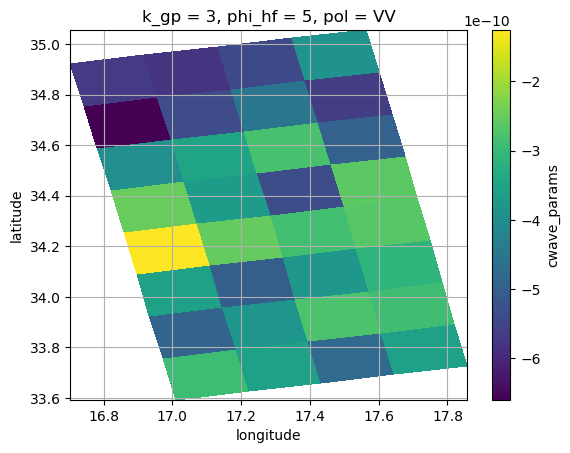

In [10]:

cwave_parameters_inter.cwave_params.sel(phi_hf=5,k_gp=3).plot(x='longitude',y='latitude');plt.grid()

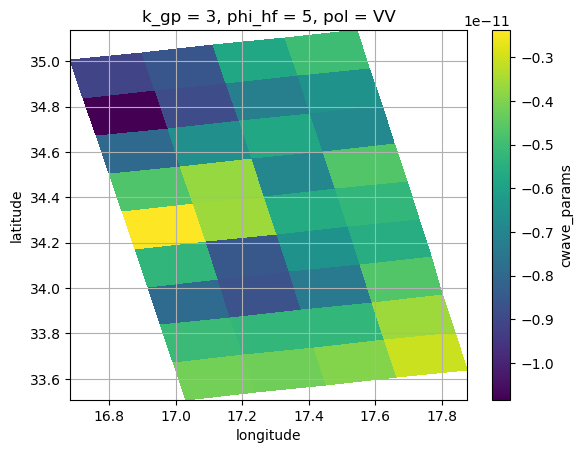

In [11]:
cwave_parameters_intra.cwave_params.sel(phi_hf=5,k_gp=3).plot(x='longitude',y='latitude');plt.grid()